# A/B Testing


## What is A/B Testing and what is it for?

A/B testing is a tool for managing the business risk associated with change and innovation. It is a basic randomized control experiment, and a way to compare the two versions of a variable to find out which performs better in a controlled environment rather than relay just on the intuition.

Statistical testing plays an important role in the A/B Testing as we need to estimate with some precision the effect of a proposed change which is where statistics take the spot.

### Examples for A/B testing application
- comparing two versions of a landing page to increase the sales conversaion rate
- comparing two different Email subjects to increase the open rate of email
- comparing two different Machine Learning models for a recommender system, which one works better 
- Comparing two versions of a newsletter format to increase the website traffic
- Adding new payment methode to increase the e-commerce revenue


## Notes to keep in mind before conducting the A/B testing

here we use a dataset that is already created for this purpose, but in any A/B testing, there are some notes to keep in mind:

- Always understand and define your conversion goal and be clear about what you want to measure (ex: click-through rate, website traffic, open rate, conversaion rate,...)

- Think about:
    - how big of a sample size do you need/want? 
    - how to randomly selecting the sample from the population and avoid sampling bias?
    - Who will participate in the test, new customers or existing customers?
    - Will you run your own test or use A/B testing software? 
    - For how long will the test run?


##  Process to conduct a A/B testing:

- Understand business problem & the nature of data
- Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
- Explore summary stats and plots
- Formulate the hypothesis testing
- Check assumptions of Normality & Homogeneity
- Based on the result of the assumption choose and apply the right statistical tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
  - Split & Define Control Group & Test Group
   - Apply Shapiro Test for normality
   - If parametric apply Levene Test for homogeneity of variances
   - If Parametric + homogeneity of variances apply T-Test
   - If Parametric - homogeneity of variances apply Welch Test
   - If Non-parametric apply Mann Whitney U Test directly
- Annalyze & evaluate the results and see which variation had the biggest positive impact on the conversion metric that matters most?
- Make inferences
- Recommend business decision to your customer/director/ceo etc.

## Hypothesis Testing

Null Hypothesis is a widely established fact or an accepted belive. 
Alternative Hypothesis is a new claim or idea to replace the Null Hypothesis, and is what we might hope that your A/B test will prove to be true.

Normally it is difficult to prove a new claim or idea, and in Hypothesis Testing instead of proving the alternative Hypothesis, We examine if we have enough proof to reject the Null Hypothesis.

In A/B testing, the null hypothesis states that there is no difference in the goal measure between the control and test groups. 

### Two types of Error in Hypothesis Testing

There are two types of errors that may occur in our hypothesis testing:
1.	Type I error: We reject the null hypothesis when it is true. That is we accept the variant B when it is not performing better than A
2.	Type II error: We failed to reject the null hypothesis when it is false. It means we conclude variant B is not good when it performs better than A

To avoid these errors we must calculate the statistical significance of our test.

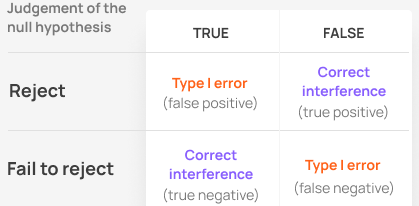


### Key A/B test statistics

Important A/B testing statistics used to convey information about the uncertainty associated with an observed outcome include:

   - p-values
   - confidence levels
   - confidence intervals
    
### How to interpret A/B test statistics

Here is a brief recap on interpreting the key statistics used in A/B testing.

- Use confidence intervals to judge how much uncertainty there is surrounding any observed test outcome. Values outside the interval can be excluded with a confidence level equal to that of the interval, e.g. 95%.

- Use p-values to reject claims that if true would hinder the adoption of the proposed change. The lower the p-value, the lower the probability of falsely rejecting such claims.

- Confidence, or the observed confidence level is a mirror of the p-value. Higher confidence means there is less uncertainty in the evidence in favor of rejecting the null hypothesis.

- If a p-value is higher than the desired significance threshold, or a confidence level is lower than a desired confidence threshold, do not implement the tested variant.

###  Let's learn about the dataset and variables:

Cookie Cats is a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase.

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40. The number of players is roughly the same in the control and test group
In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention for these two groups.

There are 5 variables in the dataset as following:

- userid: contains a unique number that identifies each player.    
- version: contains two values gate_30 (this is the control group -players in a gate at level 30) or 
                    gate_40 (this is the group with the moved gate -players in a gate at level 40).        
- sum_gamerounds: The number of game rounds played by the player during the first 14 days after install.    
- retention_1: Did the player come back and play 1 day after installing?    
- retention_7: Did the player come back and play 7 days after installing?



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv(r'C:\Users\solmaz\Desktop\CV\AB testing/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
print('Dataset has {} rows'.format(df.shape[0]))
print('Dataset has {} columns'.format(df.shape[1]))

print(" Variables Type ".center(90, '-')) 
print(df.dtypes)

print(" Head ".center(90, "-"))
print(df.head())

print(" Tail ".center(90, "-"))
print(df.tail())

print(" Misssing Values ".center(90, "-"))
print(df.isnull().sum())

print(" Duplicated Values ".center(90, "-"))
print(df.duplicated().sum())

print(" Statistics ".center(90, "-"))
print(df['sum_gamerounds'].describe().T)

Dataset has 90189 rows
Dataset has 5 columns
------------------------------------- Variables Type -------------------------------------
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object
------------------------------------------ Head ------------------------------------------
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
------------------------------------------ Tail ------------------------------------------
        userid  version  sum_gamerounds  retention_1  retention_7
90184  9999441  gate_40              97         True        False
90185  9999479  gate_40              30      

### The number of players in each group

In [7]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


### first view of the dataset

- Ther are no Missing values or Duplicated rows in the dataset.
- 50% of the users played 16 or less game rounds during the first 14 days after install
- 75% of the users played 51 or less game rounds during the first 14 days after install
- Max game rounds played= 49854

### Analyzing the players behavior

To have an idea how many gamerounds were played by the users in the first 14 days after installing the game, we plot the ditribution of the sum_gameround.

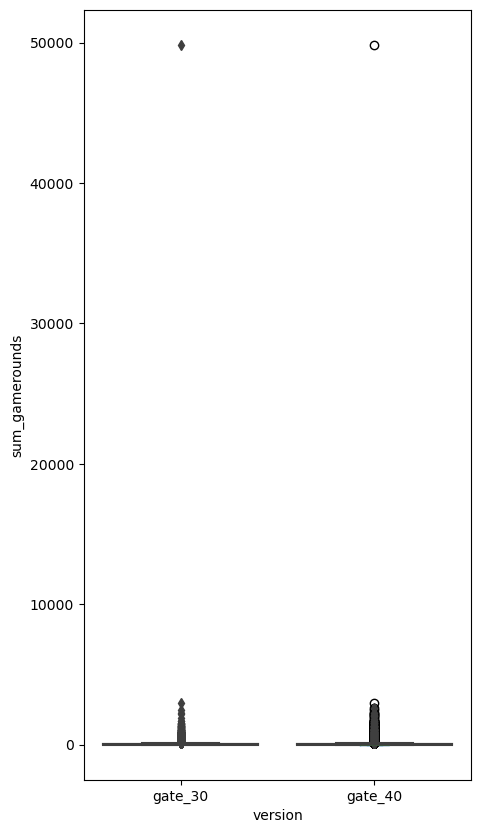

In [8]:
import seaborn as sns
df['sum_gamerounds'].plot.box(figsize=(5,10))
sns.boxplot(data=df, x='version', y='sum_gamerounds')
plt.show()

Clearly there is an outlier that skewed the distribution. Let's drop the outlier and reexamine the distrbution. 

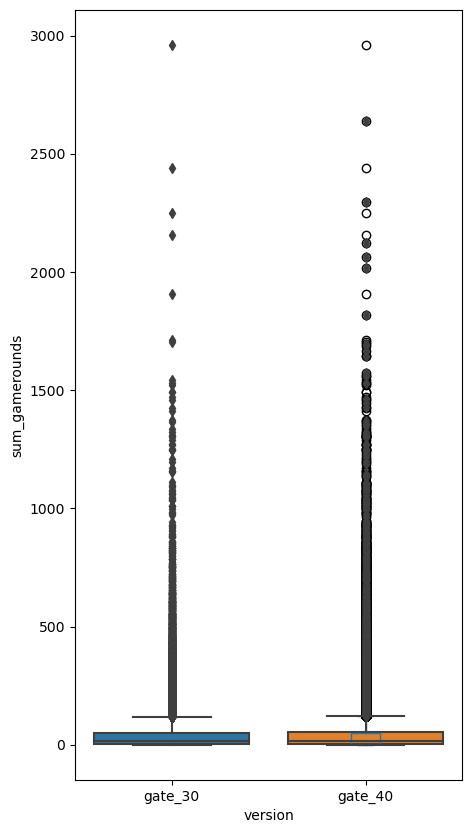

In [9]:
# drop the outlier
#df2 = df.drop(df[df['userid'] == 6390605].index)

df2['sum_gamerounds'].plot.box(figsize=(5,10))
sns.boxplot(data=df2, x='version', y='sum_gamerounds')
plt.show()

Still the box plot shows very skewed distribution. it seems the majority of the players played less than 100 gameround during the first 14 days. Let's plot a histogram for this population and analyze the behavior of majority of the users. 

In [60]:
# we write a function to get rid of the outlier values.
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [11]:
replace_with_thresholds(df, "sum_gamerounds")
df.sum_gamerounds.describe()

count    90189.000000
mean        51.109221
std         99.312282
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       1232.500000
Name: sum_gamerounds, dtype: float64

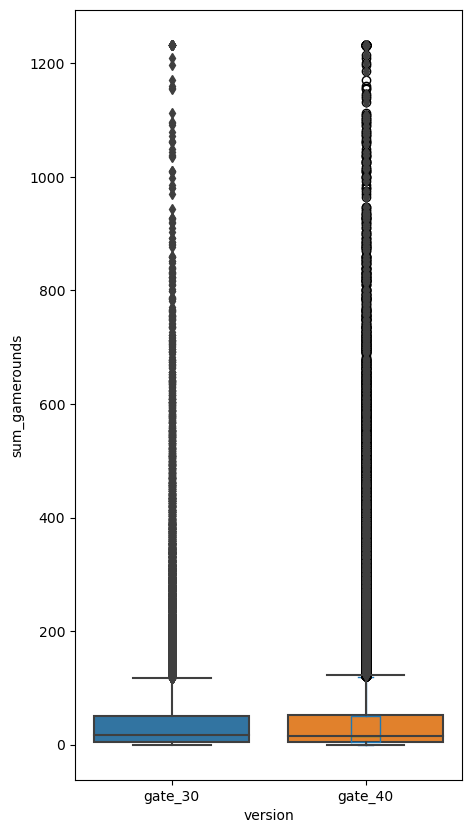

In [12]:
#df['sum_gamerounds'].plot.box(figsize=(5,10))
sns.boxplot(data=df, x='version', y='sum_gamerounds')
plt.show()

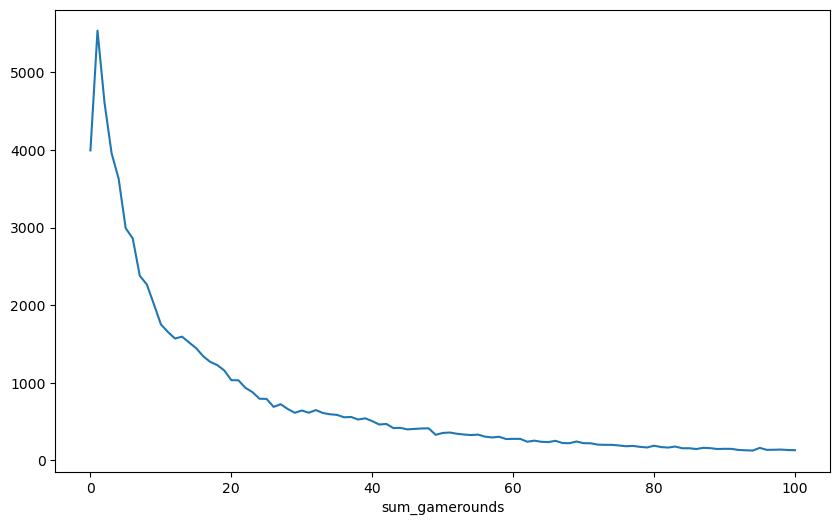

In [13]:
%matplotlib inline
df['sum_gamerounds'].plot.box

gr_per_user= df.groupby('sum_gamerounds')['userid'].count()

ax=gr_per_user[:100].plot(figsize=(10,6))

the histogram shows that 4000 users did not even play a single round of the game and almost 5700 users played just once during the test period. Meaning 10.7% of the users plyed the game once or not at all.

It is important for business to find out about the reasons of this fact.
We are curious to see what percentage of this 11% belong to the test or control groups.

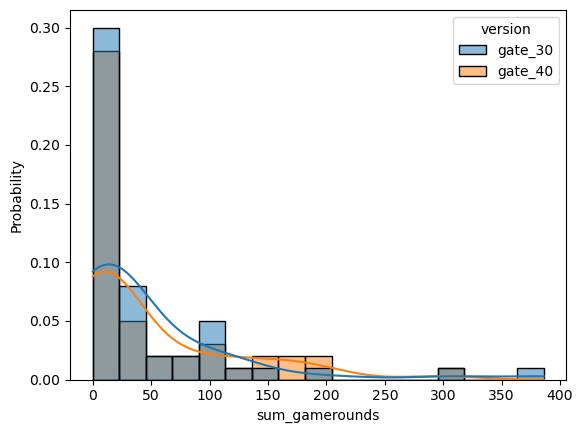

In [14]:
import seaborn as sns
df3= df[:100]

sns.histplot(data=df3, x='sum_gamerounds', hue='version', stat = 'probability', kde=True)
plt.show()

Interstingly, we see the control group who were in the gate_30 are more likely to play once or not at allthe installed game. Does this mean the game was too easy or not attractive for the users encountered the gate 30?

Let's continou exploring the data.

In [45]:
pd.DataFrame({"Version": df['version'].value_counts(),
                   "Ratio": round(100*df['version'].value_counts()/len(df),2)})

,Version,Ratio
gate_40,45489,50.44
gate_30,44700,49.56


Dataset contains almost the same ratio of group control and test group. there are 789 users more in the test group. 

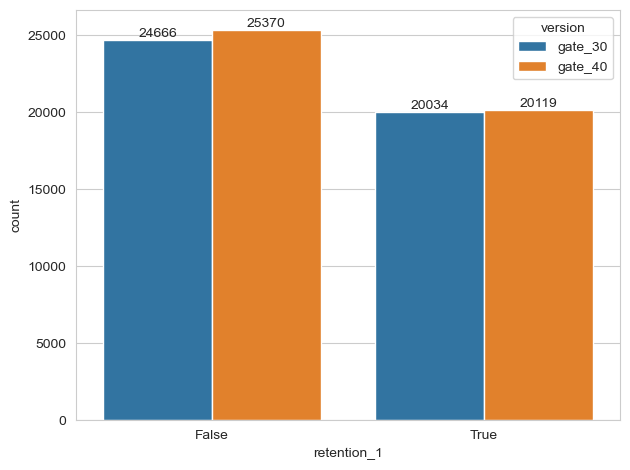

In [16]:
# Bar chart for retention_1: Did the player come back and play 1 day after installing?

import seaborn as sns
sns.set_style('whitegrid')


ax=sns.countplot(x = "retention_1", hue="version",  data = df)
for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout()
plt.show()


In [44]:
pd.DataFrame({"Retention_1": df['retention_1'].value_counts(),
                   "Ratio": round(100*df['retention_1'].value_counts()/len(df),2)})


,Retention_1,Ratio
False,50036,55.48
True,40153,44.52


55% of users did not came back and play 1 day after installing.

In [47]:
# or df.groupby('version')['retention_1'].mean()
print(df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count())

df.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


count  median       mean         std     max
version retention_1                                              
gate_30 False        24666     6.0  16.408396   37.339428  1232.5
        True         20034    48.0  93.931741  129.414956  1232.5
gate_40 False        25370     6.0  16.340067   35.914372  1232.5
        True         20119    49.0  94.854814  132.139944  1232.5

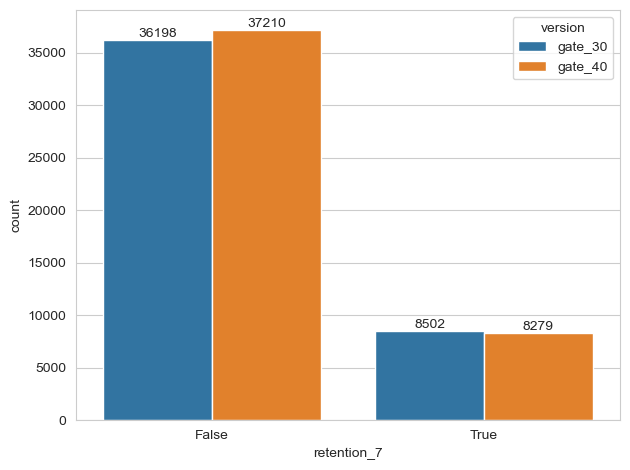

In [31]:
# Bar chart for retention_7: Did the player come back and play 7 days after installing?

ax=sns.countplot(x = "retention_7", hue="version", data = df)
for container in ax.containers:
    ax.bar_label(container)
    
    
plt.tight_layout()    
plt.show()

In [48]:
pd.DataFrame({"Retention_7": df['retention_7'].value_counts(),
                   "Ratio": round(100*df['retention_7'].value_counts()/len(df),2)})

,Retention_7,Ratio
False,73408,81.39
True,16781,18.61


only 18% of the users came back to the game and play 7 day after installing.

In [50]:
print(df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count())

df.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])


version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


count  median        mean         std     max
version retention_7                                               
gate_30 False        36198    11.0   25.796508   43.316158   981.0
        True          8502   105.0  159.112679  170.132586  1232.5
gate_40 False        37210    11.0   25.818530   42.747783  1232.5
        True          8279   111.0  164.539679  175.462721  1232.5

### Formulate the Hypothesis

There are 2 hypothesis we want to examine for 1_day Retention and 7_day Retention:

The 1-day retention and 7-day retention are important metrics in the video gaming industry to measure how fun and engaging a game is. Basically they are the percentage of players that comes back and plays the game one day and 7 days after they have installed it. The higher these metrics are, the easier it is to retain players and build a large player base.

#### hypothesis for 1_day Retention

H0 : there is no difference between the mean of 1-day Retention between two groups gate_30 (Group A) and gate_40 (Group B)
H1 : there is a difference between mean of 1-day Retention between two groups gate_30 (Group A) and gate_40 (Group B)

H0 : 1_day Retention mean of group_gate_30 = 1_day Retention mean of group_gate_40
H1 : 1_day Retention mean of group_gate_30 ≠ 1_day Retention mean of group_gate_40

#### hypothesis for 7_day Retention

H0 : 7_day Retention mean of group_gate_30 = 7_day Retention mean of group_gate_40
H1 : 7_day Retention mean of group_gate_30 ≠ 7_day Retention mean of group_gate_40

In [100]:
from scipy.stats import shapiro
import scipy.stats as stats

# Define two A and B groups:
group_A_gamerounds = df[df['version'] == "gate_30"]['sum_gamerounds']
group_B_gamerounds = df[df['version'] == "gate_40"]['sum_gamerounds']

group_A_retention_1 = df[df['version'] == "gate_30"]['retention_1']
group_B_retention_1 = df[df['version'] == "gate_30"]['retention_1']

group_A_retention_7 = df[df['version'] == "gate_30"]['retention_7']
group_B_retention_7 = df[df['version'] == "gate_30"]['retention_7']

### Testing the Normality Assumption for two groups

In [89]:
# Normality Assumption for two groups
   # H0: Distribution is Normal! - False
   # H1: Distribution is not Normal! - True

print(shapiro(group_A_gamerounds)[1]< 0.05)
print(shapiro(group_B_gamerounds)[1]< 0.05)

print(shapiro(group_A_retention_1)[1]< 0.05)
print(shapiro(group_B_retention_1)[1]< 0.05)

print(shapiro(group_A_retention_7)[1]< 0.05)
print(shapiro(group_B_retention_7)[1]< 0.05)

True
True
True
True
True
True


The normality assumption for both groups and for all 3 measures are rejected therefor we choose the Non-parametric Mann Whitney U Test to see if there are statistically significant difference between the mean of Game rounds, 1-day retention and 7-days retention for two groups

### Non-Parametric Mann Whitney U Test

#### Mann Whitney U Test for Game Rounds

In [99]:
# Non-Parametric Mann Whitney U TestTest 
  # H0: M1 == M2 - False
  # H1: M1 != M2 - True
        
t_test_gamerounds = stats.mannwhitneyu(group_A_gamerounds, group_B_gamerounds)[1] 
print(t_test_gamerounds)

0.0502080722730157


### Result for the difference of Game Rounds between gate-30 and gate-40 levels

Because the p-value > 0.05 H0 is Not Rejected, we conclude there is no statistically significant difference between the two groups.

#### Mann Whitney U Test for 1-day Retention

In [106]:
group_A_retention_1= df[df['version'] == "gate_30"]['retention_1']
group_B_retention_1= df[df['version'] == "gate_40"]['retention_1']

In [103]:
t_test_retention_1 = stats.mannwhitneyu(group_A_retention_1, group_B_retention_1)[1] 
print(t_test_retention_1)

0.07441128639919536


### Result for the difference of Game Rounds between 1-day retention and gate-40 levels

Because the p-value > 0.05 H0 is Not Rejected, we conclude there is no statistically significant difference between the two groups.

#### Mann Whitney U Test for 7-day Retention

In [107]:
group_A_retention_7 = df[df['version'] == "gate_30"]['retention_7']
group_B_retention_7 = df[df['version'] == "gate_30"]['retention_7']

In [108]:
t_test_retention_7 = stats.mannwhitneyu(group_A_retention_7, group_B_retention_7)[1] 
print(t_test_retention_7)

1.0


### Result for the difference of Game Rounds between 7-day retention and gate-40 levels

Because the p-value > 0.05 H0 is Not Rejected, we conclude there is no statistically significant difference between the two groups.

### Conclucion

The final recomendation to the business is to not move the gate-level to 40